Summary of this notebook: cleaned the data, found high and low roi groups of movies with budgets of $1,800,000 and less (that is the highest budget in the  high roi movie group). Compared the groups- there was no difference in average 'vote' rating between the groups, the genres, adventure, animation, family and history, were more likely to be found in the high roi group than in the low roi group. There are too many keywords to get any ineresting insights from them. 

In [204]:
import pandas as pd

In [205]:
tmdb_df = pd.read_csv('../data/tmdb_5000_movies.csv.zip')

In [206]:
tmdb_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.43758,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20000,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08262,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90000,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.37679,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30000,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60000,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.92699,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10000,2124


In [207]:
#drop columns I know I won't be using
tmdb_df = tmdb_df.drop(columns = ['homepage', 'original_title', 'status', 'tagline'])

In [208]:
#limit data to the last 20 years
tmdb_df.loc[:, 'release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [209]:
tmdb_df = tmdb_df.loc[tmdb_df['release_date'] > '2000-12-31']

In [210]:
tmdb_df['release_date'].describe()

count                    3328
unique                   2110
top       2006-01-01 00:00:00
freq                       10
first     2001-01-01 00:00:00
last      2017-02-03 00:00:00
Name: release_date, dtype: object

In [211]:
tmdb_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3328.00000,3328.00000,3328.00000,3328.00000,3326.00000,3328.00000,3328.00000
mean,32087552.70673,75169.70703,23.16693,88769633.27194,104.79284,5.98362,764.23708
std,44954797.45939,99625.00155,35.69683,177411358.81608,21.40653,1.22672,1326.50739
min,0.00000,12.00000,0.00239,0.00000,0.00000,0.00000,0.00000
25%,387500.00000,10066.75000,4.95045,0.00000,93.00000,5.50000,55.00000
50%,15000000.00000,24836.00000,14.04396,19697527.50000,102.00000,6.10000,268.00000
75%,40000000.00000,88219.25000,30.67624,96209130.25000,115.00000,6.70000,847.25000
max,380000000.00000,459488.00000,875.58131,2787965087.00000,338.00000,10.00000,13752.00000


In [212]:
#how many films have a zero budget?
tmdb_df['budget'].value_counts()

0            762
20000000     116
30000000     100
40000000      92
25000000      90
            ... 
25100000       1
41677699       1
4700000        1
237000000      1
19400000       1
Name: budget, Length: 338, dtype: int64

In [213]:
#drop films without budget data
tmdb_df = tmdb_df[tmdb_df['budget'] != 0]

In [214]:
#do any remaining films not have revenue data
tmdb_df['revenue'].value_counts()

0            391
32000000       2
102000000      2
17000000       2
77000000       2
            ... 
313542341      1
133718711      1
226497209      1
120175290      1
16566240       1
Name: revenue, Length: 2166, dtype: int64

In [215]:
#remove films without revenue data
tmdb_df = tmdb_df[tmdb_df['revenue'] != 0]

In [216]:
#add column for ROI
tmdb_df['roi'] = tmdb_df['revenue'] / tmdb_df['budget']
tmdb_df.head(10)

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,roi
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.43758,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.20000,11800,11.76357
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.08262,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.90000,4500,3.20333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.37679,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.30000,4466,3.59459
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.60000,9106,4.33976
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.92699,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.10000,2124,1.09284
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,The seemingly invincible Spider-Man goes up ag...,115.69981,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Spider-Man 3,5.90000,3576,3.45299
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,When the kingdom's most wanted-and most charmi...,48.68197,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tangled,7.40000,3330,2.27613
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,When Tony Stark tries to jumpstart a dormant p...,134.27923,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Avengers: Age of Ultron,7.30000,6767,5.01930
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,"As Harry begins his sixth year at Hogwarts, he...",98.88564,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{

In [217]:
tmdb_df['roi'].describe()

count      2175.00000
mean        472.38057
std       21444.07090
min           0.00000
25%           0.96268
50%           2.15303
75%           3.96034
max     1000000.00000
Name: roi, dtype: float64

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

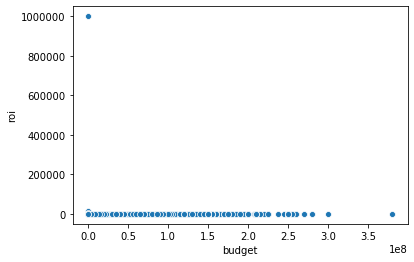

In [219]:
#look at relation ship between budget and ROI
sns.scatterplot(data = tmdb_df, x = 'budget', y = 'roi')

In [220]:
#what movies are those outliers in roi
tmdb_df[tmdb_df['roi'] > 500000]

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,roi
3137,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,"Abby Russell, a beautiful, dedicated nurse wit...",10.01363,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-09-28,10000000,99.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Nurse 3-D,4.90000,119,1000000.00000


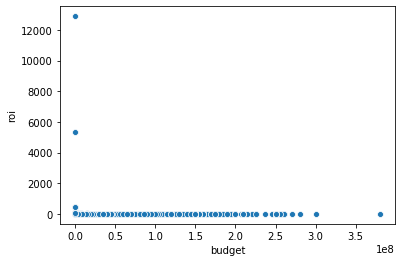

In [221]:
#scatterplot without the outliers

sns.scatterplot(data = tmdb_df[tmdb_df['roi'] < 500000], x = 'budget', y = 'roi')

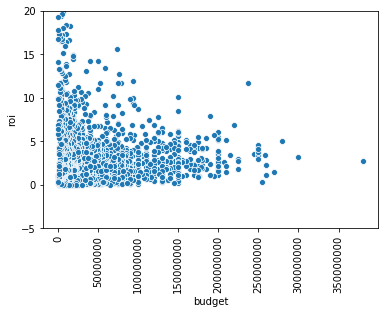

In [397]:
#zoom in on scatterplot
plt.ylim(-5, 20)
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = tmdb_df[tmdb_df['roi'] < 500000], x = 'budget', y = 'roi')

In [223]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
tmdb_df['roi'].describe()

count      2175.00000
mean        472.38057
std       21444.07090
min           0.00000
25%           0.96268
50%           2.15303
75%           3.96034
max     1000000.00000
Name: roi, dtype: float64

In [224]:
#convert release date object to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [225]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 4796
Data columns (total 17 columns):
budget                  2175 non-null int64
genres                  2175 non-null object
id                      2175 non-null int64
keywords                2175 non-null object
original_language       2175 non-null object
overview                2175 non-null object
popularity              2175 non-null float64
production_companies    2175 non-null object
production_countries    2175 non-null object
release_date            2175 non-null datetime64[ns]
revenue                 2175 non-null int64
runtime                 2175 non-null float64
spoken_languages        2175 non-null object
title                   2175 non-null object
vote_average            2175 non-null float64
vote_count              2175 non-null int64
roi                     2175 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 305.9+ KB


In [226]:
#reording the columns to make it easier to find info
#first get a list of the columns to copy/past/reorder
list(tmdb_df.columns.values)

['budget',
 'genres',
 'id',
 'keywords',
 'original_language',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'title',
 'vote_average',
 'vote_count',
 'roi']

In [227]:
tmdb_df = tmdb_df[['budget', 'revenue', 'roi', 'title', 'release_date', 'genres', 'keywords', 'vote_average', 'vote_count',  'original_language', 'production_countries', 'production_companies','popularity',  'overview','runtime', 'spoken_languages', 'id']]

In [228]:
tmdb_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
0,237000000,2787965087,11.76357,Avatar,2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.20000,11800,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",150.43758,"In the 22nd century, a paraplegic Marine is di...",162.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",19995
1,300000000,961000000,3.20333,Pirates of the Caribbean: At World's End,2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",6.90000,4500,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",139.08262,"Captain Barbossa, long believed to be dead, ha...",169.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",285
2,245000000,880674609,3.59459,Spectre,2015-10-26,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",6.30000,4466,en,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",107.37679,A cryptic message from Bond’s past sends him o...,148.00000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",206647
3,250000000,1084939099,4.33976,The Dark Knight Rises,2012-07-16,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",7.60000,9106,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",112.31295,Following the death of District Attorney Harve...,165.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",49026
4,260000000,284139100,1.09284,John Carter,2012-03-07,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",6.10000,2124,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",43.92699,"John Carter is a war-weary, former military ca...",132.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",49529


In [676]:
#create df for high roi films and low roi films
low_roi_df = tmdb_df[tmdb_df['roi'] < 6]
high_roi_df = tmdb_df[tmdb_df['roi'] >= 6]

In [713]:
# extremely low budget movies with skew the results, so I am limiting the budgets to those over $1 million
low_roi_df = low_roi_df[low_roi_df['budget'] >= 2500000]
high_roi_df = high_roi_df[high_roi_df['budget'] >= 2500000]

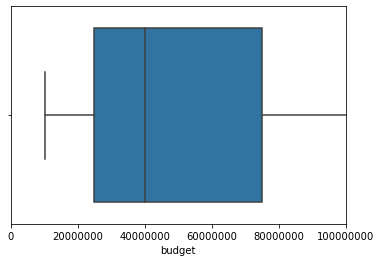

In [714]:
#boxplot to see distribution of budget for low roi films
plt.xlim(0, 100000000)
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(low_roi_df['budget'])

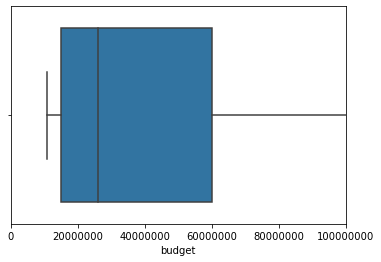

In [715]:
#boxplot to seee distribution of budget for high roi films
plt.xlim(0, 100000000)
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(high_roi_df['budget'])

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

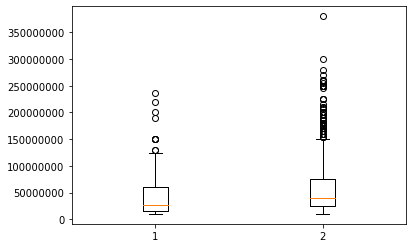

In [716]:
#just playing with the plots on the same fig- will come back to this for final
fig, ax = plt.subplots()
plt.ticklabel_format(style='plain', axis='y')
data = [high_roi_df['budget'], low_roi_df['budget']] 
ax.boxplot(data)
plt.show

In [717]:
high_roi_df['budget'].describe()

count         157.00000
mean     45444585.14013
std      44107187.08187
min      10800000.00000
25%      15000000.00000
50%      26000000.00000
75%      60000000.00000
max     237000000.00000
Name: budget, dtype: float64

In [718]:
low_roi_df['budget'].describe()

count        1589.00000
mean     58350874.51794
std      49793174.25659
min      10200000.00000
25%      25000000.00000
50%      40000000.00000
75%      75000000.00000
max     380000000.00000
Name: budget, dtype: float64

The top quintile of movie budgets in the high ROI group starts at $60,000,000, with a max of $237,000,000 while the lower quintile of the low ROI group goes up to $25,000,000 and average of $40,000,000. I will use $60 million as the cut off for further analysis to look at what lower budget movies are most successful.

In [719]:
#checking size of the new dataset
low_roi_df[low_roi_df['budget'] <= 60000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 97 to 4586
Data columns (total 17 columns):
budget                  1086 non-null int64
revenue                 1086 non-null int64
roi                     1086 non-null float64
title                   1086 non-null object
release_date            1086 non-null datetime64[ns]
genres                  1086 non-null object
keywords                1086 non-null object
vote_average            1086 non-null float64
vote_count              1086 non-null int64
original_language       1086 non-null object
production_countries    1086 non-null object
production_companies    1086 non-null object
popularity              1086 non-null float64
overview                1086 non-null object
runtime                 1086 non-null float64
spoken_languages        1086 non-null object
id                      1086 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 152.7+ KB


In [720]:
low_roi_df = low_roi_df[low_roi_df['budget'] <= 60000000]
high_roi_df = high_roi_df[high_roi_df['budget'] <= 60000000]

In [721]:
high_roi_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 631 to 3556
Data columns (total 17 columns):
budget                  118 non-null int64
revenue                 118 non-null int64
roi                     118 non-null float64
title                   118 non-null object
release_date            118 non-null datetime64[ns]
genres                  118 non-null object
keywords                118 non-null object
vote_average            118 non-null float64
vote_count              118 non-null int64
original_language       118 non-null object
production_countries    118 non-null object
production_companies    118 non-null object
popularity              118 non-null float64
overview                118 non-null object
runtime                 118 non-null float64
spoken_languages        118 non-null object
id                      118 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 16.6+ KB


In [722]:
high_roi_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
631,59000000,383257136,6.49588,Ice Age,2002-03-10,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...","[{""id"": 311, ""name"": ""human evolution""}, {""id""...",7.10000,3857,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",99.56197,"With the impending ice age almost upon them, a...",81.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",425
744,60000000,469160692,7.81934,The Lego Movie,2014-02-06,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...","[{""id"": 494, ""name"": ""father son relationship""...",7.50000,3070,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",59.54793,"An ordinary Lego mini-figure, mistakenly thoug...",100.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",137106
788,58000000,783112979,13.50195,Deadpool,2016-02-09,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",7.40000,10995,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",514.56996,Deadpool tells the origin story of former Spec...,108.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",293660
790,58800000,542307423,9.22292,American Sniper,2014-12-11,"[{""id"": 10752, ""name"": ""War""}, {""id"": 28, ""nam...","[{""id"": 1589, ""name"": ""sniper""}, {""id"": 5565, ...",7.40000,4469,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",87.53437,U.S. Navy SEAL Chris Kyle takes his sole missi...,133.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",190859
810,60000000,361366633,6.02278,Alvin and the Chipmunks,2007-12-13,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""...","[{""id"": 637, ""name"": ""pop""}, {""id"": 3490, ""nam...",5.50000,1177,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Dune Entertainment"", ""id"": 444}, {""...",47.33603,A struggling songwriter named Dave Seville fin...,92.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",6477


In [723]:
import ast

In [724]:
# get genre and keyword 'name's from dictionary to a list and then to columns with boolean
#this took a bit of work as it turns out the dictionary is actually a string that looks like a dictionary

#create a small dataset to work through this process
df_head = high_roi_df.head()

df_head.index

Int64Index([631, 744, 788, 790, 810], dtype='int64')

In [725]:
genres_list = []
for row in df_head.index:
    # first need to convert the strings to dictionarys!
    genre_dict = ast.literal_eval(df_head['genres'][row])
    #create list of values from key "name"
    genres_list = [genre.get("name") for genre in genre_dict]
    #replace the column value with the new list
    df_head['genres'][row] = genres_list


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [726]:
#it worked!
df_head

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
631,59000000,383257136,6.49588,Ice Age,2002-03-10,"[Animation, Comedy, Family, Adventure]","[{""id"": 311, ""name"": ""human evolution""}, {""id""...",7.10000,3857,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",99.56197,"With the impending ice age almost upon them, a...",81.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",425
744,60000000,469160692,7.81934,The Lego Movie,2014-02-06,"[Adventure, Animation, Comedy, Family, Fantasy]","[{""id"": 494, ""name"": ""father son relationship""...",7.50000,3070,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",59.54793,"An ordinary Lego mini-figure, mistakenly thoug...",100.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",137106
788,58000000,783112979,13.50195,Deadpool,2016-02-09,"[Action, Adventure, Comedy]","[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",7.40000,10995,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",514.56996,Deadpool tells the origin story of former Spec...,108.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",293660
790,58800000,542307423,9.22292,American Sniper,2014-12-11,"[War, Action]","[{""id"": 1589, ""name"": ""sniper""}, {""id"": 5565, ...",7.40000,4469,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",87.53437,U.S. Navy SEAL Chris Kyle takes his sole missi...,133.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",190859
810,60000000,361366633,6.02278,Alvin and the Chipmunks,2007-12-13,"[Comedy, Music, Family, Fantasy, Animation]","[{""id"": 637, ""name"": ""pop""}, {""id"": 3490, ""nam...",5.50000,1177,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Dune Entertainment"", ""id"": 444}, {""...",47.33603,A struggling songwriter named Dave Seville fin...,92.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",6477


In [727]:
#write a function that will turn each string/dictionary column into lists

def str_dict_to_list(column, dataframe) :
    names_list = []
    for row in dataframe.index:
        str_to_dict = ast.literal_eval(dataframe[column][row])
        names_list = [name.get("name") for name in str_to_dict]
        dataframe[column][row] = names_list

In [728]:
#test the function on my small data set
str_dict_to_list('keywords', df_head)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [729]:
df_head

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
631,59000000,383257136,6.49588,Ice Age,2002-03-10,"[Animation, Comedy, Family, Adventure]","[human evolution, parents kids relationship, s...",7.10000,3857,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",99.56197,"With the impending ice age almost upon them, a...",81.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",425
744,60000000,469160692,7.81934,The Lego Movie,2014-02-06,"[Adventure, Animation, Comedy, Family, Fantasy]","[father son relationship, creativity, friendsh...",7.50000,3070,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",59.54793,"An ordinary Lego mini-figure, mistakenly thoug...",100.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",137106
788,58000000,783112979,13.50195,Deadpool,2016-02-09,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero...",7.40000,10995,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",514.56996,Deadpool tells the origin story of former Spec...,108.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",293660
790,58800000,542307423,9.22292,American Sniper,2014-12-11,"[War, Action]","[sniper, biography, iraq, navy seal, u.s. sold...",7.40000,4469,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",87.53437,U.S. Navy SEAL Chris Kyle takes his sole missi...,133.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",190859
810,60000000,361366633,6.02278,Alvin and the Chipmunks,2007-12-13,"[Comedy, Music, Family, Fantasy, Animation]","[pop, pop star, record producer, surprise, app...",5.50000,1177,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Dune Entertainment"", ""id"": 444}, {""...",47.33603,A struggling songwriter named Dave Seville fin...,92.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",6477


In [730]:
#use function on high and low roi datasets for all columns that look like dictionaries
str_dict_to_list('genres', low_roi_df)
low_roi_df.head()

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
97,15000000,77000000,5.13333,Shin Godzilla,2016-07-29,"[Action, Adventure, Drama, Horror, Science Fic...","[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",6.50000,143,ja,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]","[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...",9.47700,From the mind behind Evangelion comes a hit la...,120.00000,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",315011
99,38000000,207283925,5.45484,The Fast and the Furious,2001-06-22,"[Action, Crime, Thriller]","[{""id"": 542, ""name"": ""street gang""}, {""id"": 83...",6.60000,3428,en,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",6.90994,Domenic Toretto is a Los Angeles street racer ...,106.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",9799
411,60000000,47664559,0.79441,Scott Pilgrim vs. the World,2010-07-27,"[Action, Adventure, Comedy]","[{""id"": 170335, ""name"": ""whipping""}, {""id"": 17...",7.20000,2126,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",38.88520,Scott Pilgrim is a film adaptation of the crit...,112.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",22538
412,60000000,74208267,1.23680,The Core,2003-03-28,"[Action, Thriller, Adventure, Science Fiction]","[{""id"": 5178, ""name"": ""magnetic field""}, {""id""...",5.40000,516,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",29.21125,Geophysicist Dr. Josh Keyes discovers that an ...,136.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",9341
415,50000000,41037742,0.82075,Dredd,2012-09-07,"[Action, Science Fiction]","[{""id"": 279, ""name"": ""usa""}, {""id"": 417, ""name...",6.60000,1940,en,"[{""iso_3166_1"": ""ZA"", ""name"": ""South Africa""},...","[{""name"": ""DNA Films"", ""id"": 284}, {""name"": ""R...",57.67393,"In the future, America is a dystopian wastelan...",95.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",49049


In [731]:
low_roi_df.tail()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
3699,15000000,13060843,0.87072,25th Hour,2002-12-16,"[Crime, Drama]","[{""id"": 378, ""name"": ""prison""}, {""id"": 1563, ""...",7.20000,629,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""40 Acres & A Mule Filmworks"", ""id"":...",30.19604,The filmed adaptation from David Benioff's nov...,135.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1429
3792,16000000,318982,0.01994,Adore,2013-04-03,[Drama],"[{""id"": 4663, ""name"": ""lovers""}, {""id"": 187056...",6.10000,291,en,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...","[{""name"": ""Gaumont"", ""id"": 9}, {""name"": ""Cin\u...",18.79022,"Lil and Roz are two lifelong friends, having g...",100.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",111190
4039,30000000,495303,0.01651,Idiocracy,2006-09-01,"[Adventure, Comedy, Science Fiction]","[{""id"": 549, ""name"": ""prostitute""}, {""id"": 592...",6.30000,664,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",27.94009,To test its top-secret Human Hibernation Proje...,84.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7512
4122,13500000,187674,0.01390,Stonewall,2015-09-18,[Drama],"[{""id"": 173510, ""name"": ""stonewall riot""}]",5.20000,32,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Centropolis Entertainment"", ""id"": 3...",5.16023,"""Stonewall"" is a drama about a young man in Ne...",129.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",273899
4586,35000000,170000000,4.85714,What Happens in Vegas,2008-05-07,"[Comedy, Romance]","[{""id"": 585, ""name"": ""casino""}, {""id"": 612, ""n...",5.80000,923,da,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",38.10049,"During a wild vacation in Las Vegas, career wo...",99.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",9029


In [732]:
#had to start at 5 because already did the first 5 in testing the function
str_dict_to_list('genres', high_roi_df[5:])


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [733]:
#also tested keywords, so again starting with 5
str_dict_to_list('keywords', high_roi_df[5:])
str_dict_to_list('production_countries', high_roi_df)
str_dict_to_list('production_companies', high_roi_df)
str_dict_to_list('spoken_languages', high_roi_df)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [734]:
high_roi_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
631,59000000,383257136,6.49588,Ice Age,2002-03-10,"[Animation, Comedy, Family, Adventure]","[human evolution, parents kids relationship, s...",7.10000,3857,en,[United States of America],"[Twentieth Century Fox Film Corporation, Blue ...",99.56197,"With the impending ice age almost upon them, a...",81.00000,[English],425
744,60000000,469160692,7.81934,The Lego Movie,2014-02-06,"[Adventure, Animation, Comedy, Family, Fantasy]","[father son relationship, creativity, friendsh...",7.50000,3070,en,[United States of America],"[Village Roadshow Pictures, DC Comics, Vertigo...",59.54793,"An ordinary Lego mini-figure, mistakenly thoug...",100.00000,[English],137106
788,58000000,783112979,13.50195,Deadpool,2016-02-09,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero...",7.40000,10995,en,[United States of America],"[Twentieth Century Fox Film Corporation, Marve...",514.56996,Deadpool tells the origin story of former Spec...,108.00000,[English],293660
790,58800000,542307423,9.22292,American Sniper,2014-12-11,"[War, Action]","[sniper, biography, iraq, navy seal, u.s. sold...",7.40000,4469,en,[United States of America],"[Village Roadshow Pictures, Malpaso Production...",87.53437,U.S. Navy SEAL Chris Kyle takes his sole missi...,133.00000,[English],190859
810,60000000,361366633,6.02278,Alvin and the Chipmunks,2007-12-13,"[Comedy, Music, Family, Fantasy, Animation]","[pop, pop star, record producer, surprise, app...",5.50000,1177,en,[United States of America],"[Dune Entertainment, Regency Enterprises, Fox ...",47.33603,A struggling songwriter named Dave Seville fin...,92.00000,"[English, Español, Français, 日本語]",6477


In [735]:
str_dict_to_list('keywords', low_roi_df)
str_dict_to_list('production_countries', low_roi_df)
str_dict_to_list('production_companies', low_roi_df)
str_dict_to_list('spoken_languages', low_roi_df)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [736]:
low_roi_df.sort_values(by = ['release_date']).tail(5)

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
914,50000000,216972543,4.33945,Central Intelligence,2016-06-15,"[Action, Comedy]","[spy, cia, espionage, high school reunion, ref...",6.20000,1650,en,[United States of America],"[New Line Cinema, Universal Pictures, Bluegras...",45.31870,After he reunites with an old pal through Face...,107.00000,[English],302699
979,50000000,25035950,0.50072,Free State of Jones,2016-06-24,"[War, Action, Drama, History, Thriller]","[slavery, american civil war]",6.60000,428,en,[United States of America],"[Larger Than Life Productions, Vendian Enterta...",21.58939,"In 1863, Mississippi farmer Newt Knight serves...",139.00000,"[English, Deutsch]",316152
1038,25000000,15436808,0.61747,The Infiltrator,2016-07-13,"[Crime, Drama, Thriller]","[undercover, biography, drug, drug lord]",6.60000,573,en,[United Kingdom],[Good Films],24.67223,A U.S Customs official uncovers a massive mone...,127.00000,"[English, Español]",325789
2167,20000000,83707310,4.18537,Nerve,2016-07-27,"[Mystery, Adventure, Crime]","[based on novel, technology, internet, hacking...",7.10000,2181,en,[United States of America],"[Lionsgate, Allison Shearmur Productions, Keep...",62.93390,"Industrious high school senior, Vee Delmonico,...",96.00000,[English],328387
97,15000000,77000000,5.13333,Shin Godzilla,2016-07-29,"[Action, Adventure, Drama, Horror, Science Fic...","[monster, godzilla, giant monster, destruction...",6.50000,143,ja,[Japan],"[Cine Bazar, Toho Pictures]",9.47700,From the mind behind Evangelion comes a hit la...,120.00000,"[Italiano, Deutsch, English, 日本語]",315011


In [737]:
#do low roi movies get lower ratings than high roi movies?

low_roi_df['vote_average'].describe()

count   1086.00000
mean       6.11234
std        0.81066
min        3.00000
25%        5.60000
50%        6.10000
75%        6.67500
max        8.00000
Name: vote_average, dtype: float64

In [738]:
high_roi_df['vote_average'].describe()

count   118.00000
mean      6.65085
std       0.76099
min       4.60000
25%       6.10000
50%       6.70000
75%       7.30000
max       8.30000
Name: vote_average, dtype: float64

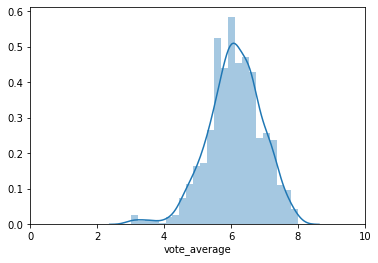

In [739]:
plt.xlim(0, 10)
sns.distplot(low_roi_df['vote_average'])

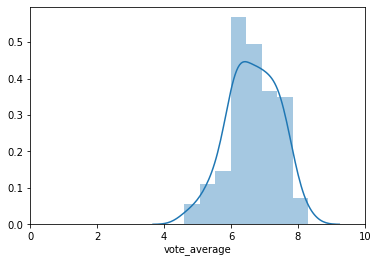

In [740]:
plt.xlim(0, 10)
sns.distplot(high_roi_df['vote_average'])

In [741]:
low_roi_df['vote_count'].describe()

count   1086.00000
mean     683.60405
std      760.95888
min        3.00000
25%      207.25000
50%      438.50000
75%      857.50000
max     5878.00000
Name: vote_count, dtype: float64

In [742]:
high_roi_df['vote_count'].describe()

count     118.00000
mean     1909.32203
std      1606.42694
min       137.00000
25%       724.00000
50%      1414.00000
75%      2742.25000
max     10995.00000
Name: vote_count, dtype: float64

In [743]:
#limit to movies with >100 ratings
low_roi_df[low_roi_df['vote_count'] >= 100]['vote_average'].describe()

count   962.00000
mean      6.16580
std       0.78731
min       3.00000
25%       5.70000
50%       6.20000
75%       6.70000
max       8.00000
Name: vote_average, dtype: float64

In [744]:
high_roi_df[high_roi_df['vote_count'] >= 100]['vote_average'].describe()

count   118.00000
mean      6.65085
std       0.76099
min       4.60000
25%       6.10000
50%       6.70000
75%       7.30000
max       8.30000
Name: vote_average, dtype: float64

In [745]:
low_roi_df['popularity'].describe()

count   1086.00000
mean      23.62231
std       16.50711
min        0.33519
25%       11.53176
50%       19.53474
75%       31.89244
max      116.70032
Name: popularity, dtype: float64

In [746]:
high_roi_df['popularity'].describe()

count   118.00000
mean     51.12424
std      51.20856
min       6.03515
25%      28.61620
50%      38.39730
75%      63.48417
max     514.56996
Name: popularity, dtype: float64

The high ROI movies have slightly better ratings than the low ROI movies, but are more popular at the higher end (which means that more tmdb users are favoriting, viewing, voting for and interacting the movie's page).

In [747]:
low_roi_df.isna().sum()

budget                  0
revenue                 0
roi                     0
title                   0
release_date            0
genres                  0
keywords                0
vote_average            0
vote_count              0
original_language       0
production_countries    0
production_companies    0
popularity              0
overview                0
runtime                 0
spoken_languages        0
id                      0
dtype: int64

In [748]:
high_roi_df.isna().sum()

budget                  0
revenue                 0
roi                     0
title                   0
release_date            0
genres                  0
keywords                0
vote_average            0
vote_count              0
original_language       0
production_countries    0
production_companies    0
popularity              0
overview                0
runtime                 0
spoken_languages        0
id                      0
dtype: int64

In [749]:
low_roi_df['genres'].head

<bound method NDFrame.head of 97      [Action, Adventure, Drama, Horror, Science Fic...
99                              [Action, Crime, Thriller]
411                           [Action, Adventure, Comedy]
412        [Action, Thriller, Adventure, Science Fiction]
415                             [Action, Science Fiction]
                              ...                        
3699                                       [Crime, Drama]
3792                                              [Drama]
4039                 [Adventure, Comedy, Science Fiction]
4122                                              [Drama]
4586                                    [Comedy, Romance]
Name: genres, Length: 1086, dtype: object>

In [750]:
#create unique list of genres in low roi dataset
low_genres_list = []
for row in low_roi_df['genres']:
    for item in row:
        low_genres_list.append(item)

        
low_genres_list = sorted(list(set(low_genres_list)))

In [751]:
low_genres_list

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western']

In [752]:
#list of genres in high roi dataset

high_genres_list = set(high_roi_df['genres'].sum())
        


In [753]:
high_genres_list

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [754]:
#create dataframe with low roi genres column
low_genres_df = pd.DataFrame(low_roi_df['genres'])
low_genres_df.head()

,genres
97,"[Action, Adventure, Drama, Horror, Science Fic..."
99,"[Action, Crime, Thriller]"
411,"[Action, Adventure, Comedy]"
412,"[Action, Thriller, Adventure, Science Fiction]"
415,"[Action, Science Fiction]"


In [755]:
high_genres_df = pd.DataFrame(high_roi_df['genres'])
high_genres_df.head()

,genres
631,"[Animation, Comedy, Family, Adventure]"
744,"[Adventure, Animation, Comedy, Family, Fantasy]"
788,"[Action, Adventure, Comedy]"
790,"[War, Action]"
810,"[Comedy, Music, Family, Fantasy, Animation]"


In [756]:
for col in low_genres_list:
    low_genres_df[col] = 0
low_genres_df.head()

,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
97,"[Action, Adventure, Drama, Horror, Science Fic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,"[Action, Crime, Thriller]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
411,"[Action, Adventure, Comedy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,"[Action, Thriller, Adventure, Science Fiction]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,"[Action, Science Fiction]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [757]:
for col in high_genres_list:
    high_genres_df[col] = 0
high_genres_df.head()

,genres,Comedy,Music,Thriller,Western,Horror,Adventure,Documentary,Fantasy,Animation,Action,Drama,Mystery,Science Fiction,War,Family,History,Crime,Romance
631,"[Animation, Comedy, Family, Adventure]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
744,"[Adventure, Animation, Comedy, Family, Fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
788,"[Action, Adventure, Comedy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
790,"[War, Action]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
810,"[Comedy, Music, Family, Fantasy, Animation]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [758]:
for row in high_genres_df.index:
    for genre in high_genres_list:
        if genre in high_genres_df['genres'][row]:
            high_genres_df[genre][row]  = 1
high_genres_df.head()

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,genres,Comedy,Music,Thriller,Western,Horror,Adventure,Documentary,Fantasy,Animation,Action,Drama,Mystery,Science Fiction,War,Family,History,Crime,Romance
631,"[Animation, Comedy, Family, Adventure]",1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
744,"[Adventure, Animation, Comedy, Family, Fantasy]",1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
788,"[Action, Adventure, Comedy]",1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
790,"[War, Action]",0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
810,"[Comedy, Music, Family, Fantasy, Animation]",1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


In [759]:
for row in low_genres_df.index:
    for genre in low_genres_list:
        if genre in low_genres_df['genres'][row]:
            low_genres_df[genre][row]  = 1
low_genres_df.head()

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
97,"[Action, Adventure, Drama, Horror, Science Fic...",1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
99,"[Action, Crime, Thriller]",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
411,"[Action, Adventure, Comedy]",1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,"[Action, Thriller, Adventure, Science Fiction]",1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
415,"[Action, Science Fiction]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [760]:
low_genres_mean = pd.DataFrame(low_genres_df.mean(), columns = ['percent_of_movies'])
high_genres_mean = pd.DataFrame(high_genres_df.mean(), columns = ['percent_of_movies'])
high_genres_mean.head()


,percent_of_movies
Comedy,0.43220
Music,0.09322
Thriller,0.18644
Western,0.00847
Horror,0.10169


In [761]:
low_genres_mean.head()

,percent_of_movies
Action,0.25046
Adventure,0.13168
Animation,0.03407
Comedy,0.38582
Crime,0.19245


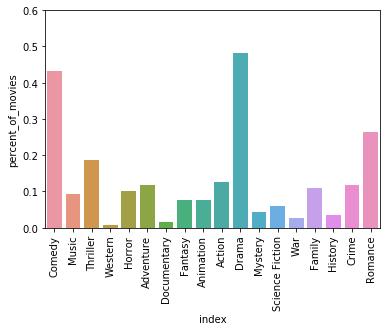

In [762]:
plt.ylim(0, 0.6)
plt.xticks(rotation = 90)
sns.barplot(data = high_genres_mean.reset_index(), x = 'index', y = 'percent_of_movies')

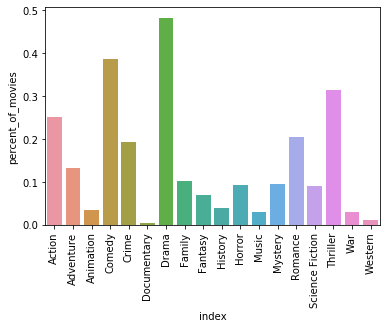

In [763]:
plt.xticks(rotation=90)
sns.barplot(data = low_genres_mean.reset_index(), x = 'index', y = 'percent_of_movies')

In [764]:
low_genres_sum = pd.DataFrame(low_genres_df.sum(), columns = ['number_of_movies'])
high_genres_sum = pd.DataFrame(high_genres_df.sum(), columns = ['number_of_movies'])
high_genres_sum.drop(['genres'], inplace = True)

In [765]:
low_genres_sum.drop(['genres'], inplace = True)

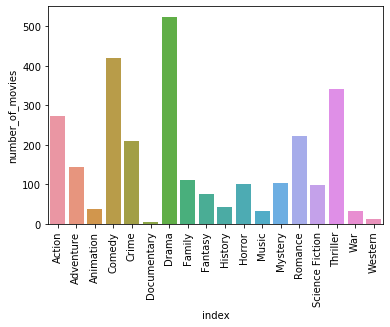

In [766]:
plt.xticks(rotation=90)
sns.barplot(data = low_genres_sum.reset_index(), x = 'index', y = 'number_of_movies')

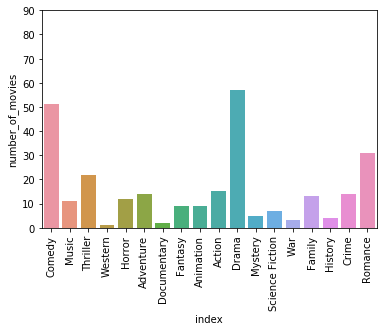

In [767]:
plt.ylim(0, 90)
plt.xticks(rotation=90)
sns.barplot(data = high_genres_sum.reset_index(), x = 'index', y = 'number_of_movies')

In [768]:
genre_numbers_df = high_genres_sum.reset_index().merge(low_genres_sum.reset_index(), on = 'index', suffixes = ('_high_roi', '_low_roi'))
genre_numbers_df.head()

,index,number_of_movies_high_roi,number_of_movies_low_roi
0,Comedy,51,419
1,Music,11,33
2,Thriller,22,342
3,Western,1,13
4,Horror,12,101


In [769]:
genre_numbers_df['percent_movies_high_roi'] = genre_numbers_df['number_of_movies_high_roi']/(genre_numbers_df['number_of_movies_high_roi']+genre_numbers_df['number_of_movies_low_roi'])

In [770]:
genre_numbers_df.head()

,index,number_of_movies_high_roi,number_of_movies_low_roi,percent_movies_high_roi
0,Comedy,51,419,0.10851
1,Music,11,33,0.25000
2,Thriller,22,342,0.06044
3,Western,1,13,0.07143
4,Horror,12,101,0.10619


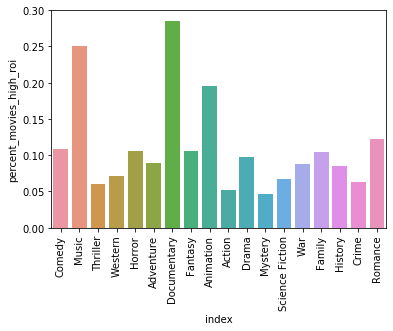

In [771]:

plt.xticks(rotation=90)
sns.barplot(data = genre_numbers_df.reset_index(), x = 'index', y = 'percent_movies_high_roi')

In [772]:
high_keywords_list = []
for row in high_roi_df['keywords']:
    for item in row:
        high_keywords_list.append(item)
        
high_keywords_list = sorted(list(set(high_keywords_list)))

In [773]:
len(high_keywords_list)

894

In [774]:
high_keywords_df = pd.DataFrame(high_roi_df['keywords'])
high_keywords_df.head()

,keywords
631,"[human evolution, parents kids relationship, s..."
744,"[father son relationship, creativity, friendsh..."
788,"[anti hero, mercenary, marvel comic, superhero..."
790,"[sniper, biography, iraq, navy seal, u.s. sold..."
810,"[pop, pop star, record producer, surprise, app..."


In [775]:
for col in high_keywords_list:
    high_keywords_df[col] = 0

In [776]:
high_keywords_df.head()

,keywords,1960s,1970s,1980s,19th century,3d,abolitionist,abuse,abusive father,acapella,...,wound,writer,wrongful arrest,wyoming,xenophobia,yakuza,yokai,young adult,young people,young woman
631,"[human evolution, parents kids relationship, s...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,"[father son relationship, creativity, friendsh...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,"[anti hero, mercenary, marvel comic, superhero...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,"[sniper, biography, iraq, navy seal, u.s. sold...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
810,"[pop, pop star, record producer, surprise, app...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [777]:
for row in high_keywords_df.index:
    for word in high_keywords_list:
        if word in high_keywords_df['keywords'][row]:
            high_keywords_df[word][row] = 1

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [778]:
high_keywords_df.head()

,keywords,1960s,1970s,1980s,19th century,3d,abolitionist,abuse,abusive father,acapella,...,wound,writer,wrongful arrest,wyoming,xenophobia,yakuza,yokai,young adult,young people,young woman
631,"[human evolution, parents kids relationship, s...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,"[father son relationship, creativity, friendsh...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,"[anti hero, mercenary, marvel comic, superhero...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,"[sniper, biography, iraq, navy seal, u.s. sold...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
810,"[pop, pop star, record producer, surprise, app...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [779]:
high_keywords_sum = pd.DataFrame(high_keywords_df.sum(), columns = ['number_of_movies'])
high_keywords_sum.drop(['keywords'], inplace = True)
high_keywords_sum.sort_values(by = ['number_of_movies'], ascending = False).head(20)

,number_of_movies
duringcreditsstinger,23
woman director,10
aftercreditsstinger,9
teenager,7
party,6
competition,6
friendship,6
based on novel,6
kidnapping,5
high school,5


In [780]:
high_keywords_sum.describe()

,number_of_movies
count,894
unique,10
top,1
freq,738


In [781]:
high_roi_df['release_date'].dt.year.mean()

2009.093220338983

In [782]:
low_roi_df['release_date'].dt.year.mean()

2008.1022099447514

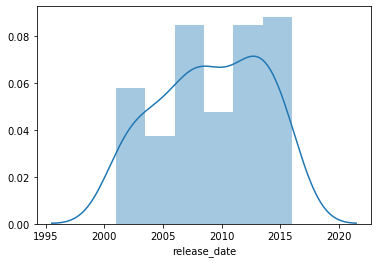

In [783]:
sns.distplot(high_roi_df['release_date'].dt.year)

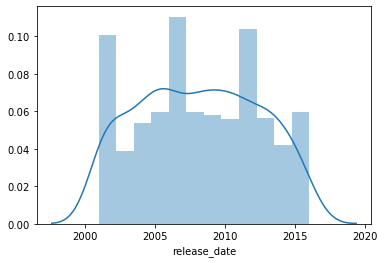

In [784]:
sns.distplot(low_roi_df['release_date'].dt.year)

In [785]:
recent_high_roi_df = high_roi_df[high_roi_df['release_date'].dt.year > 1999]

In [786]:
recent_genres_high_df = pd.DataFrame(recent_high_roi_df['genres'])

In [787]:
r_g_list = []
for row in recent_genres_high_df.index:
    for item in recent_genres_high_df['genres'][row]:
        r_g_list.append(item)
        
set(r_g_list)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [788]:
recent_low_roi_df = low_roi_df[low_roi_df['release_date'].dt.year > 1999]
recent_genres_low_df = pd.DataFrame(recent_low_roi_df['genres'])
l_r_g_list = []
for row in recent_genres_low_df.index:
    for item in recent_genres_low_df['genres'][row]:
        l_r_g_list.append(item)
        
set(l_r_g_list)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [789]:


for col in l_r_g_list:
    recent_genres_low_df[col] = 0
    
for col in r_g_list:
    recent_genres_high_df[col] = 0

In [790]:
recent_genres_high_df.head()

,genres,Animation,Comedy,Family,Adventure,Fantasy,Action,War,Music,Crime,Drama,Romance,Thriller,Horror,Western,Mystery,Science Fiction,History,Documentary
631,"[Animation, Comedy, Family, Adventure]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
744,"[Adventure, Animation, Comedy, Family, Fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
788,"[Action, Adventure, Comedy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
790,"[War, Action]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
810,"[Comedy, Music, Family, Fantasy, Animation]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [791]:
for row in recent_genres_high_df.index:
    for genre in r_g_list:
        if genre in recent_genres_high_df['genres'][row]:
            recent_genres_high_df[genre][row] = 1

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [792]:
for row in recent_genres_low_df.index:
    for genre in l_r_g_list:
        if genre in recent_genres_low_df['genres'][row]:
            recent_genres_low_df[genre][row] = 1

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [793]:
imdb_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz', compression = 'gzip')

In [794]:
high_roi_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
631,59000000,383257136,6.49588,Ice Age,2002-03-10,"[Animation, Comedy, Family, Adventure]","[human evolution, parents kids relationship, s...",7.10000,3857,en,[United States of America],"[Twentieth Century Fox Film Corporation, Blue ...",99.56197,"With the impending ice age almost upon them, a...",81.00000,[English],425
744,60000000,469160692,7.81934,The Lego Movie,2014-02-06,"[Adventure, Animation, Comedy, Family, Fantasy]","[father son relationship, creativity, friendsh...",7.50000,3070,en,[United States of America],"[Village Roadshow Pictures, DC Comics, Vertigo...",59.54793,"An ordinary Lego mini-figure, mistakenly thoug...",100.00000,[English],137106
788,58000000,783112979,13.50195,Deadpool,2016-02-09,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero...",7.40000,10995,en,[United States of America],"[Twentieth Century Fox Film Corporation, Marve...",514.56996,Deadpool tells the origin story of former Spec...,108.00000,[English],293660
790,58800000,542307423,9.22292,American Sniper,2014-12-11,"[War, Action]","[sniper, biography, iraq, navy seal, u.s. sold...",7.40000,4469,en,[United States of America],"[Village Roadshow Pictures, Malpaso Production...",87.53437,U.S. Navy SEAL Chris Kyle takes his sole missi...,133.00000,[English],190859
810,60000000,361366633,6.02278,Alvin and the Chipmunks,2007-12-13,"[Comedy, Music, Family, Fantasy, Animation]","[pop, pop star, record producer, surprise, app...",5.50000,1177,en,[United States of America],"[Dune Entertainment, Regency Enterprises, Fox ...",47.33603,A struggling songwriter named Dave Seville fin...,92.00000,"[English, Español, Français, 日本語]",6477


In [795]:
imdb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy"


In [796]:
high_roi_df['release_date'].describe()

count                     118
unique                    117
top       2012-02-01 00:00:00
freq                        2
first     2001-01-12 00:00:00
last      2016-07-28 00:00:00
Name: release_date, dtype: object

In [797]:
high_roi_df.loc['release_date'] =  pd.to_datetime(high_roi_df['release_date'])

In [798]:
high_roi_df.loc[high_roi_df['release_date'].isna()]

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
release_date,NaT,NaT,nan,NaN,NaT,NaN,NaN,nan,NaT,NaN,NaN,NaN,nan,NaN,nan,NaN,NaT


In [799]:
high_roi_df['year'] = high_roi_df.release_date.dt.year.astype('Int64')

In [800]:
high_roi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 631 to release_date
Data columns (total 18 columns):
budget                  118 non-null object
revenue                 118 non-null object
roi                     118 non-null float64
title                   118 non-null object
release_date            118 non-null datetime64[ns]
genres                  118 non-null object
keywords                118 non-null object
vote_average            118 non-null float64
vote_count              118 non-null object
original_language       118 non-null object
production_countries    118 non-null object
production_companies    118 non-null object
popularity              118 non-null float64
overview                118 non-null object
runtime                 118 non-null float64
spoken_languages        118 non-null object
id                      118 non-null object
year                    118 non-null Int64
dtypes: Int64(1), datetime64[ns](1), float64(4), object(12)
memory usage: 22.8+ KB


In [801]:
high_roi_df.drop(high_roi_df.tail(1).index, inplace=True)

In [802]:
high_roi_df.merge(imdb_df, left_on = ['title', 'year'], right_on = ['primary_title', 'start_year'] )

,budget,revenue,roi,title,release_date,genres_x,keywords,vote_average,vote_count,original_language,...,runtime,spoken_languages,id,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres_y
0,60000000,469160692,7.81934,The Lego Movie,2014-02-06,"[Adventure, Animation, Comedy, Family, Fantasy]","[father son relationship, creativity, friendsh...",7.50000,3070,en,...,100.00000,[English],137106,2014,tt1490017,The Lego Movie,The Lego Movie,2014,100.00000,"Action,Adventure,Animation"
1,58000000,783112979,13.50195,Deadpool,2016-02-09,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero...",7.40000,10995,en,...,108.00000,[English],293660,2016,tt1431045,Deadpool,Deadpool,2016,108.00000,"Action,Adventure,Comedy"
2,58800000,542307423,9.22292,American Sniper,2014-12-11,"[War, Action]","[sniper, biography, iraq, navy seal, u.s. sold...",7.40000,4469,en,...,133.00000,[English],190859,2014,tt2179136,American Sniper,American Sniper,2014,133.00000,"Action,Biography,Drama"
3,50000000,549368315,10.98737,Ted,2012-06-29,"[Comedy, Fantasy]","[friendship, love, teddy bear, toy comes to li...",6.30000,4697,en,...,106.00000,[English],72105,2012,tt1637725,Ted,Ted,2012,106.00000,"Comedy,Fantasy"
4,48000000,325771424,6.78690,Taken 3,2014-12-16,"[Thriller, Action]","[revenge, murder, on the run, fugitive, framed...",6.10000,2200,en,...,109.00000,[English],260346,2014,tt2446042,Taken 3,Taken 3,2014,108.00000,"Action,Thriller"
5,45000000,376141306,8.35870,Taken 2,2012-09-27,"[Action, Crime, Thriller]","[kidnapping, turkey, police chase, bag over he...",6.10000,2757,en,...,91.00000,"[English, Türkçe, العربية]",82675,2012,tt1397280,Taken 2,Taken 2,2012,92.00000,"Action,Thriller"
6,40000000,251171807,6.27930,American Hustle,2013-12-12,"[Drama, Crime]","[con artist, scam, mobster, fbi agent]",6.80000,2807,en,...,138.00000,[English],168672,2013,tt1800241,American Hustle,American Hustle,2013,138.00000,"Crime,Drama"
7,40000000,571006128,14.27515,Fifty Shades of Grey,2015-02-11,"[Drama, Romance, Thriller]","[based on novel, perversion, spanking, billion...",5.20000,3254,en,...,125.00000,[English],216015,2015,tt2322441,Fifty Shades of Grey,Fifty Shades of Grey,2015,125.00000,"Drama,Romance,Thriller"
8,40000000,320170008,8.00425,The Conjuring 2,2016-05-13,[Horror],"[london england, england, 1970s, spirit, singl...",7.00000,1949,en,...,134.00000,[English],259693,2016,tt3065204,The Conjuring 2,The Conjuring 2,2016,134.00000,"Drama,Horror,Mystery"
9,37000000,269994119,7.29714,We're the Millers,2013-08-07,"[Comedy, Crime]","[mexico, police, gang, drug smuggling, drug, f...",6.80000,2972,en,...,110.00000,[English],138832,2013,tt1723121,We're the Millers,We're the Millers,2013,110.00000,"Comedy,Crime"


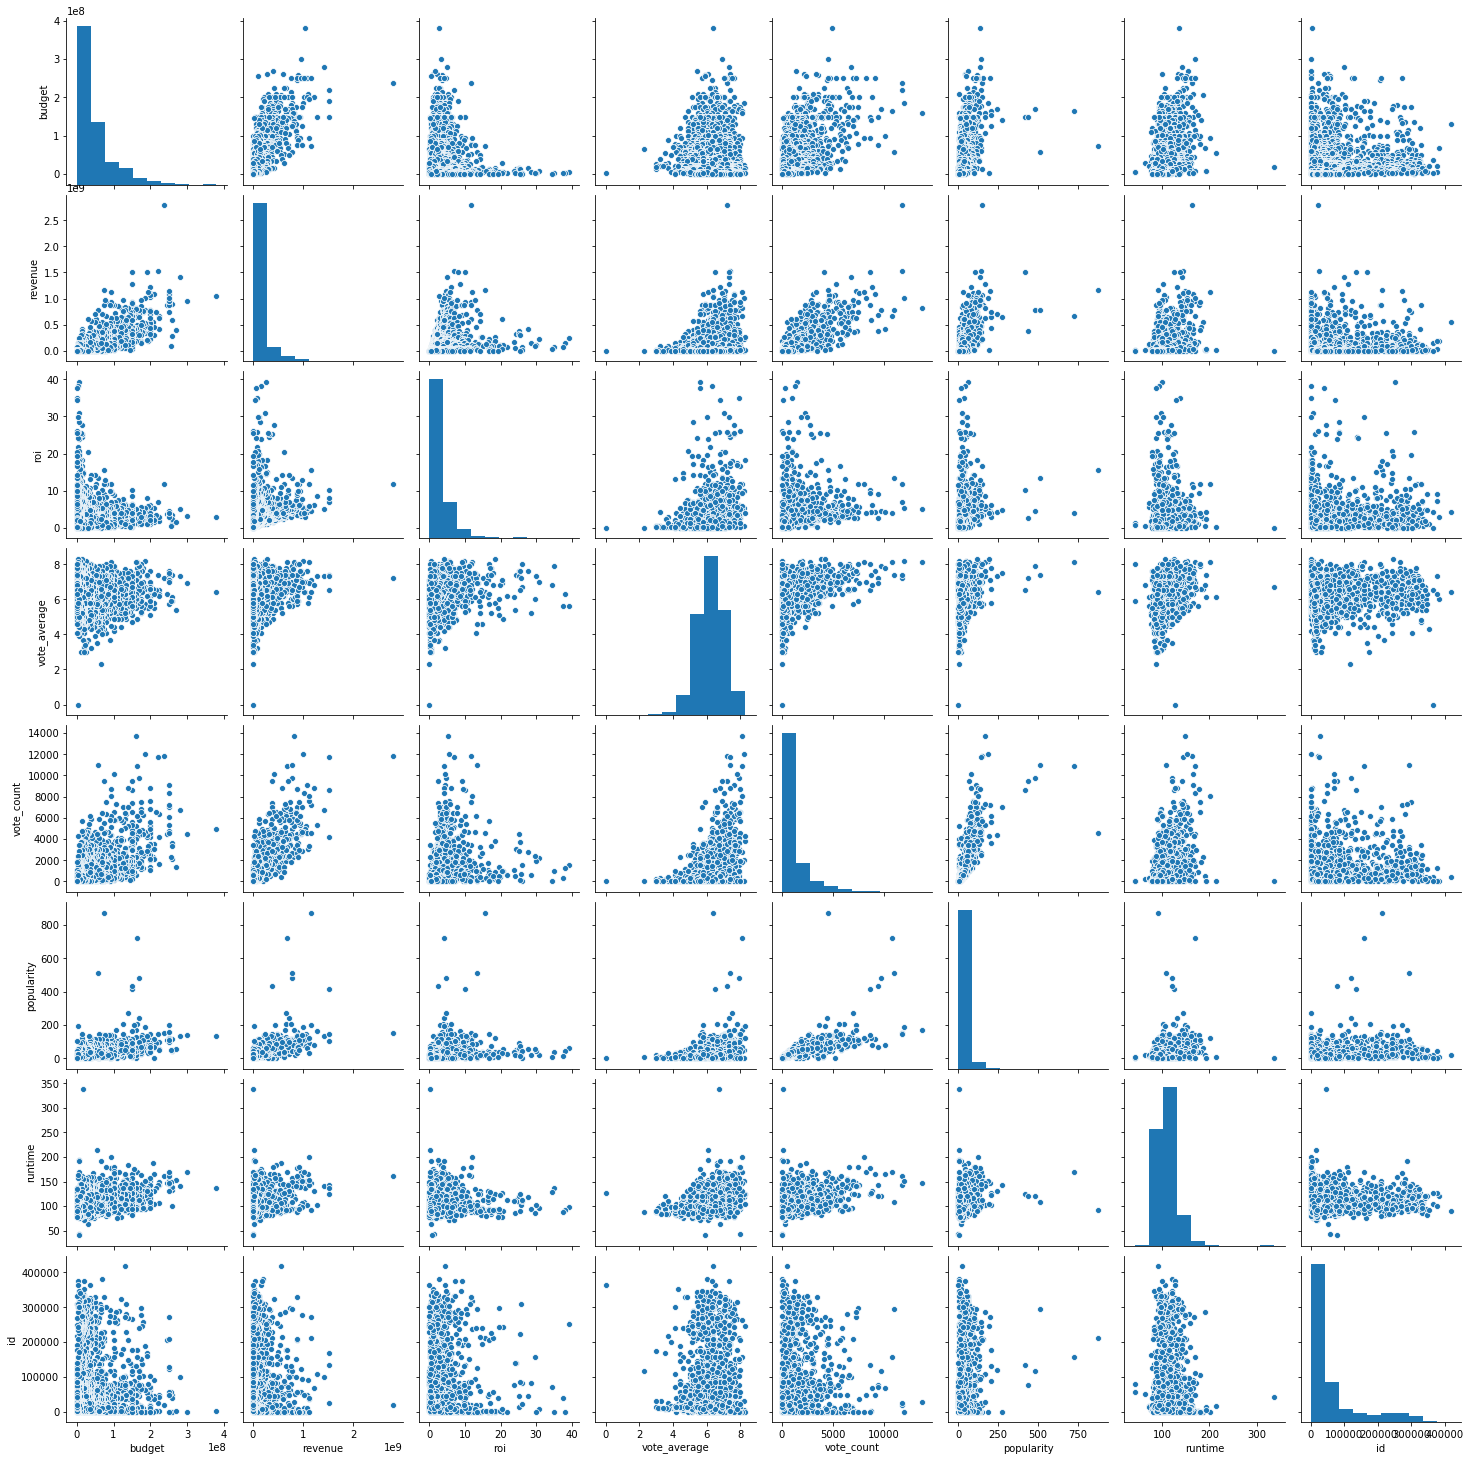

In [804]:
sns.pairplot(tmdb_df[tmdb_df['roi']<40])